**Importing modules**

In [ ]:
!pip install pycountry_convert
#imports
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.dates as md
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

     |████████████████████████████████| 10.1MB 6.5MB/s 
     |████████████████████████████████| 245kB 33.1MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=013c1ff20bee57deaed04571de9496d620c42a8cd179ccc5492286f9a06fe5f9
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.5 which is incompatible.
ERROR: pytest-cov 2.12.0 has requirement pytest>=4.6, but you'll have pytest 3.6.4 which is incompatible.
ERROR: pytest-mock 3.6.1 has requirement pytest>=5.0, but you'll have pytest 3.6.4 which is incompatible.
  Found existing installation: coverage 3.7.1

**Importing data**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/transformed.csv')  #Path to transformed_data 
data.head(5)

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


**Dataset contains** 
1.  **CODE**
2.  **COUNTRY**
3.  **DATE**
4.  **HDI : human_development_index**
5.  **TC : total_cases**
6.  **TD : total_deaths**
7.  **STI : stringency_index**
8.  **POP : population**
9.  **GDPCAP : gdp_per_capita** 











In [ ]:
data['DATE'] = pd.to_datetime(data['DATE'], format = '%Y-%m-%d') #converting date into y-m-d format
data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(0)

**HUMAN DEVELOPMENT INDEX (HDI)**

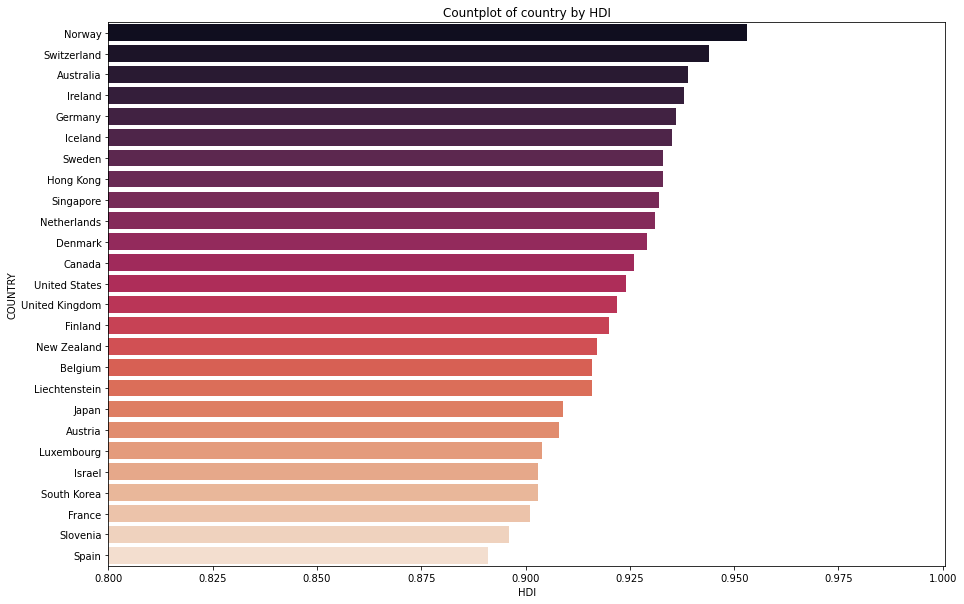

In [ ]:
et = data.sort_values(by='HDI', ascending=False)[:7000]
figure = plt.figure(figsize=(15,10))
sns.barplot(y=et.COUNTRY, x=et.HDI, palette="rocket")
plt.xticks()
plt.xlabel('HDI')
plt.xlim(xmin=0.8)
plt.ylabel('COUNTRY')
plt.title('Countplot of country by HDI')
plt.show()

**Correlation between HDI and GDPCAP also the HDI mean**

In [ ]:
data["HDI"].corr(data["GDPCAP"]), data["HDI"].mean()

(0.7482094801756279, 0.6315531159508068)

**STRINGENCY INDEX (SI)**

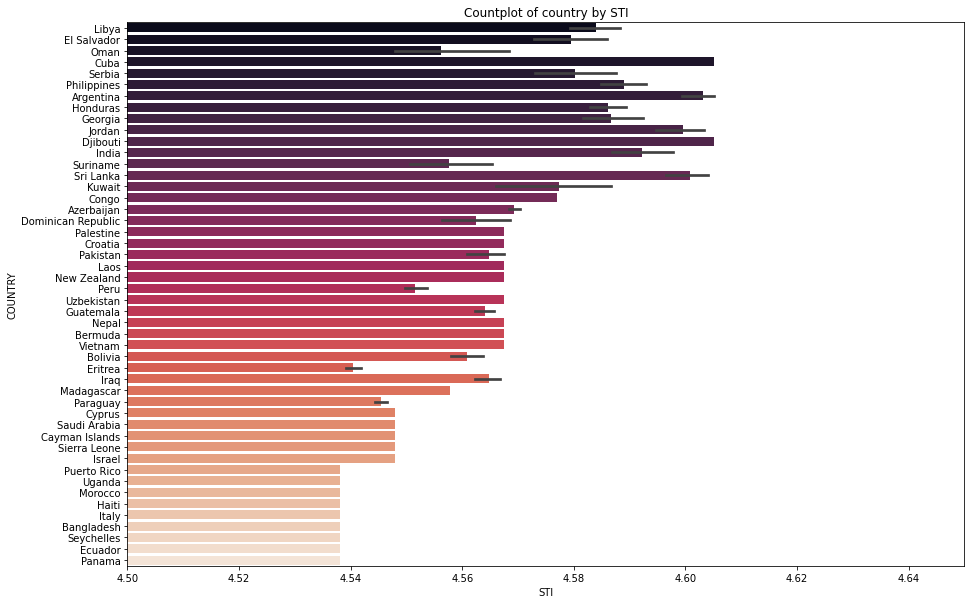

In [ ]:
et = data.sort_values(by='STI', ascending=False)[:2000]
figure = plt.figure(figsize=(15,10))
sns.barplot(y=et.COUNTRY, x=et.STI, palette='rocket')
plt.xticks()
plt.xlim([4.5, 4.65])
plt.xlabel('STI')
plt.ylabel('COUNTRY')
plt.title('Countplot of country by STI')
plt.show()

In [ ]:
data['STI'].mean()

3.1788969163848186

**GROSS DOMESTIC PRODUCT PER CAPITA (GDPCAP)**

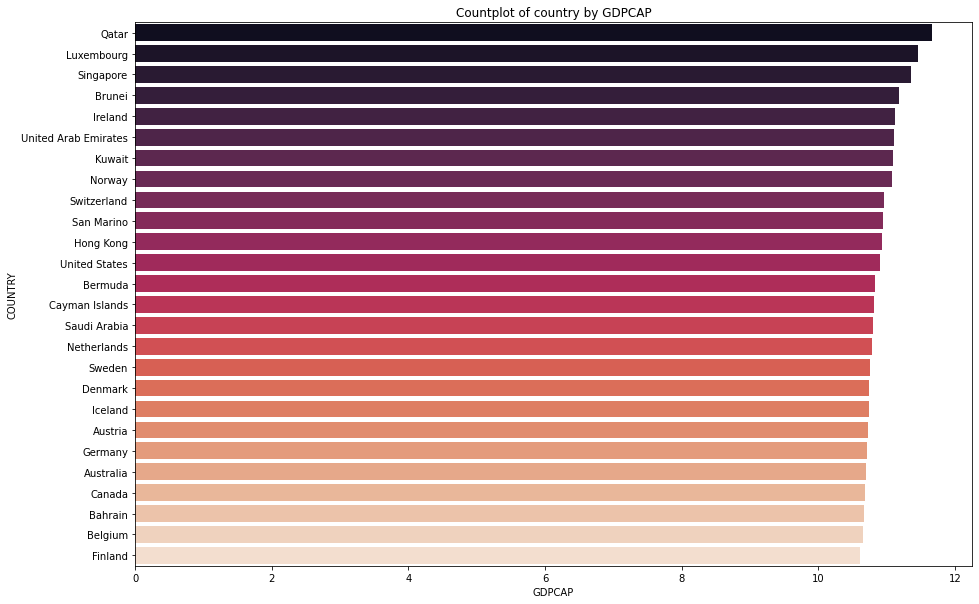

In [ ]:
et = data.sort_values(by='GDPCAP', ascending=False)[:7000]
figure = plt.figure(figsize=(15,10))
sns.barplot(y=et.COUNTRY, x=et.GDPCAP, palette='rocket')
plt.xticks()
plt.xlabel('GDPCAP')
plt.ylabel('COUNTRY')
plt.title('Countplot of country by GDPCAP')
plt.show()

**IMPACT OF COVID-19**

COUNTRYWISE

In [ ]:
@interact
def data_show(country=sorted(set(data['COUNTRY']))):
    HDI= data[data['COUNTRY']==country]['HDI'].max()*10
    GDPCAP = data[data['COUNTRY']==country]['GDPCAP'].mean()
    POP= data[data['COUNTRY']==country]['POP'].max()

    total1= [HDI, GDPCAP, POP]

    TD= data[data['COUNTRY']==country].groupby(['DATE']).agg({'TD':['sum']})
    TC = data[data['COUNTRY']==country].groupby(['DATE']).agg({'TC':['sum']})
    STI = data[data['COUNTRY']==country].groupby(['DATE']).agg({'STI':['sum']})

    total2 = TD.join(TC).join(STI)

    plt.figure(figsize=(15,10))
    plt.subplot(121)
    names = ['HDI','GDPCAP', 'POP']
    plt.bar(names, total1)
    plt.ylabel("Counts", size=13)
    plt.subplot(122)
    total2.plot(ax=plt.gca(), title=country)
    plt.ylim((0, 16))
    # setting the max value to see the data in the same env
    plt.ylabel("Counts", size=13)

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra',…

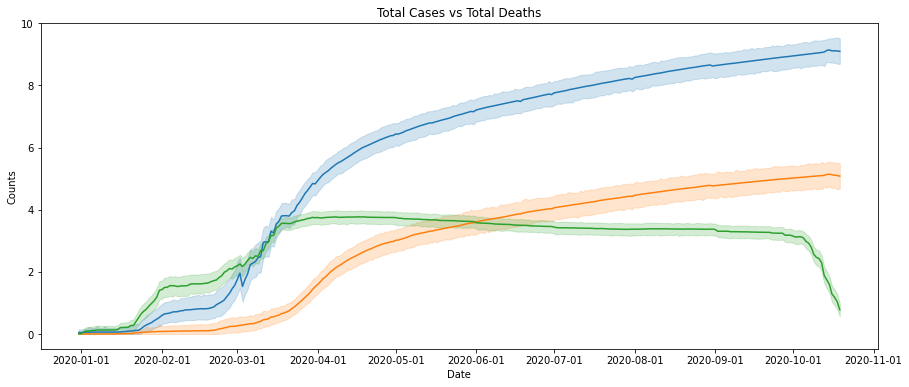

In [ ]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.lineplot(x=data["DATE"], y=data["TC"])
sns.lineplot(x=data["DATE"], y=data["TD"])
sns.lineplot(x=data["DATE"], y=data["STI"])

ax.set_title("Total Cases vs Total Deaths")
ax.set_xlabel("Date")
ax.set_ylabel("Counts")

ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))


In [ ]:
#correlation between the total cases and deaths
data["TC"].corr(data["TD"])

0.9183722940131004

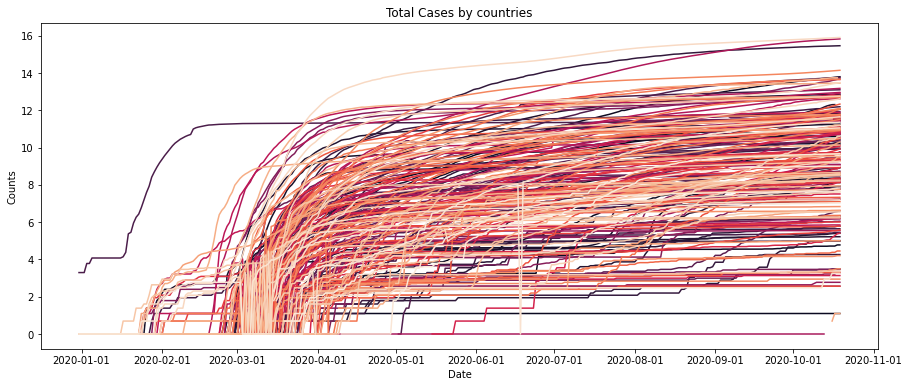

In [ ]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.lineplot(data=data, x='DATE', y='TC', hue='COUNTRY', legend=False, palette='rocket')

ax.set_title("Total Cases by countries")
ax.set_xlabel("Date")
ax.set_ylabel("Counts")

ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

CONTINENTWISE

In [ ]:
x=[]
for i in range(len(data)):
    if data['TC'].values[i]!=0:
        x.append(data['TD'].values[i]/data['TC'].values[i])
    else:
        x.append(0)
data['Ratio']=x

In [ ]:
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return cn_continent

In [ ]:
data['CONTINENT'] = data['COUNTRY'].apply(get_continent)

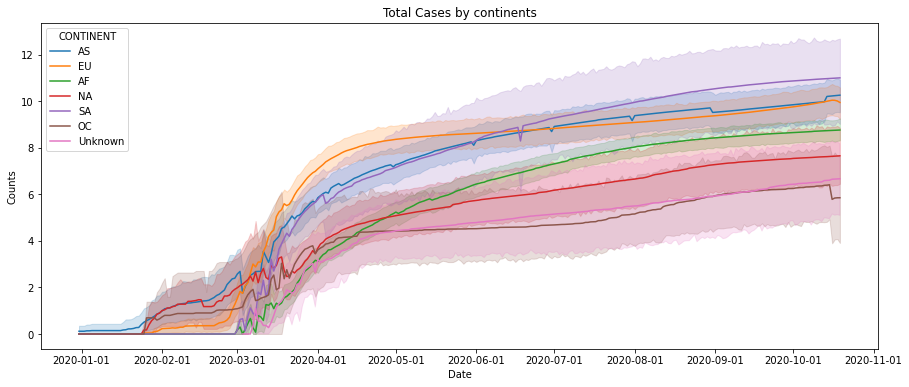

In [ ]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.lineplot(data=data, x='DATE', y='TC', hue='CONTINENT')

ax.set_title("Total Cases by continents")
ax.set_xlabel("Date")
ax.set_ylabel("Counts")

ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

1.  **AF - Africa**
2.  **AS - Asia**
3.  **EU - Europe**
4.  **NA - North America**
5.  **OC - Oceania**
6.  **SA - South America**

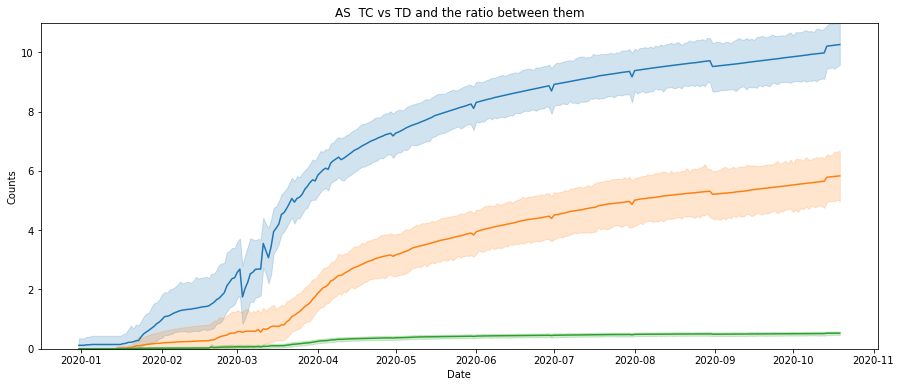

In [ ]:
@interact
def data_show(continent=sorted(set(data['CONTINENT']))):
    fig, ax = plt.subplots(figsize = (15, 6))

    sns.lineplot(x=data['DATE'], y=data[data['CONTINENT'] == continent]['TC'])
    sns.lineplot(x=data['DATE'], y=data[data['CONTINENT'] == continent]['TD'])
    sns.lineplot(x=data['DATE'], y=data[data['CONTINENT'] == continent]['Ratio'])

    ax.set_title(f"{continent}  TC vs TD and the ratio between them")
    ax.set_xlabel("Date")
    plt.ylim((0, 11))
    # setting the max value to see the data in the same env
    ax.set_ylabel("Counts")